In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 

# Extracting necessary SINMOD data

Extracting more than a few time steps will take a while and potentially cause crashing. Then we will need to run on IDUN. Can set up via VS code ssh.

We will now:
- Look at a few data sets to check the numbers make sense
- Standardise and normalise the data

In [94]:
import netCDF4 as nc
from netCDF4 import Dataset

# Importing SINMOD data
filename_PhysStates = '/cluster/projects/itk-SINMOD/coral-mapping/gin/spinup/run2/PhysStates.nc'

PhysStates_data = Dataset(filename_PhysStates, 'r')

filename_PhysStates = '/cluster/projects/itk-SINMOD/coral-mapping/nor4km_2019/2019/PhysStates.nc'

nor4km_PhysStates_data = Dataset(filename_PhysStates, 'r')

# Looking at our list of available variables
variables_list = list(PhysStates_data.variables.keys())
for variable in variables_list:
    units = PhysStates_data.variables[variable].units if 'units' in PhysStates_data.variables[variable].ncattrs() else 'No units'
    print(f"{variable:<20} {units}")

time                 No units
grid_mapping         No units
LayerDepths          m
xc                   meter
yc                   meter
zc                   m
depth                m
DXxDYy               m2
u_velocity           m/s
v_velocity           m/s
elevation            m
temperature          degC
salinity             psu
ice_thickness        m
ice_compactness      -
salinity_ice         psu


In [3]:
# Extracting all the map dimensions, we can extract both ways, I don't think it matters
xc = PhysStates_data.variables['xc'][:]  # x-coordinates (meters)
yc = PhysStates_data.variables['yc'][:]  # y-coordinates (meters)
zc = PhysStates_data['LayerDepths'][:]  # z-coordinates (meters)

# Now checking temperature data matches what we expect from the dimensions
# Extracting temperature at t = 0, and check the dimensions
temperature_var = PhysStates_data.variables['temperature']
temperature = temperature_var[0,:,:,:]
print("SINMOD grid dimensions:")
print(f"xc shape: {xc.shape}")
print(f"yc shape: {yc.shape}")
print(f"zc shape: {zc.shape}")

print(f"\nTemperature data shape: {temperature.shape}")
# Now checking mean, max and min temperature to see if it makes sense
print(f"Mean temperature:\t{temperature.mean():.2f}")
print(f"Max temperature:\t{temperature.max():.2f}")
print(f"Min temperature:\t{temperature.min():.2f}")

# Repeating for salinity
salinity_var = PhysStates_data.variables['salinity']
salinity = salinity_var[0,:,:,:]

print(f"\nSalinity data shape:\t{salinity.shape}")
print(f"Mean salinity:\t\t{salinity.mean():.2f}")
print(f"Max salinity:\t\t{salinity.max():.2f}")
print(f"Min salinity:\t\t{salinity.min():.2f}")


SINMOD grid dimensions:
xc shape: (300,)
yc shape: (235,)
zc shape: (25,)

Temperature data shape: (25, 235, 300)
Mean temperature:	1.89
Max temperature:	11.51
Min temperature:	-1.80

Salinity data shape:	(25, 235, 300)
Mean salinity:		34.14
Max salinity:		37.37
Min salinity:		0.10


In [4]:
from sklearn.preprocessing import StandardScaler

# Many options for what sort of standardisation we want here, but a simple one:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the temperature and salinity data
temperature_standardized = scaler.fit_transform(temperature.reshape(-1, 1)).reshape(temperature.shape)
salinity_standardized = scaler.fit_transform(salinity.reshape(-1, 1)).reshape(salinity.shape)

# Print the mean and standard deviation of the standardised data to verify
print(f"Standardised Temperature - Mean: {temperature_standardized.mean():.2f}, Std Dev: {temperature_standardized.std():.2f}")
print(f"Standardised Salinity - Mean: {salinity_standardized.mean():.2f}, Std Dev: {salinity_standardized.std():.2f}")

Standardised Temperature - Mean: 0.00, Std Dev: 1.00
Standardised Salinity - Mean: -0.00, Std Dev: 1.00


In [5]:
# We want to save this processed data, there are multiple options:
# 1. NetCDF
# 2. Pandas (2D data)
# 3. Xarray ()
# Need to determine best method

Now repeating for Biostates

In [6]:
# Importing BioStates data
filename_BioStates = '/cluster/projects/itk-SINMOD/coral-mapping/gin/spinup/run2/BioStates.nc'

BioStates_data = Dataset(filename_BioStates, 'r')

# Looking at our list of available variables
bio_variables_list = list(BioStates_data.variables.keys())
for variable in bio_variables_list:
    units = BioStates_data.variables[variable].units if 'units' in BioStates_data.variables[variable].ncattrs() else 'No units'
    print(f"{variable:<20} {units}")

time                 No units
grid_mapping         No units
LayerDepths          m
xc                   meter
yc                   meter
zc                   m
depth                m
DXxDYy               m2
nitrate              mmmol N m-3
silicate             mmmol N m-3
ammonium             mmmol N m-3
diatoms              mmmol N m-3
flagellates          mmmol N m-3
ciliates             mmmol N m-3
HNANO                mmmol N m-3
bacteria             mmmol N m-3
calanus_finmarchicus gC m-2
calanus_glacialis    gC m-2
detritus_slow        mmmol N m-3
detritus_fast        mmmol N m-3
DOC                  mmmol N m-3
cDOM                 m-1
silicate_detritus    mmmol N m-3
sediment_Si          mmmol Si m-2
sediment_N           mmmol N m-2


In [7]:
# Extracting silicate and DOC data
silicate_var = BioStates_data.variables['silicate']
DOC_var = BioStates_data.variables['DOC']

# Extracting silicate and DOC at t = 0, and check the dimensions
silicate = silicate_var[0, :, :, :]
DOC = DOC_var[0, :, :, :]

print("Silicate data shape:", silicate.shape)
print(f"Mean silicate:\t{silicate.mean():.2f}")
print(f"Max silicate:\t{silicate.max():.2f}")
print(f"Min silicate:\t{silicate.min():.2f}")

print("\nDOC data shape:", DOC.shape)
print(f"Mean DOC:\t{DOC.mean():.2f}")
print(f"Max DOC:\t{DOC.max():.2f}")
print(f"Min DOC:\t{DOC.min():.2f}")

Silicate data shape: (25, 235, 300)
Mean silicate:	7.07
Max silicate:	99.35
Min silicate:	0.17

DOC data shape: (25, 235, 300)
Mean DOC:	0.00
Max DOC:	0.08
Min DOC:	0.00


# Extracting coral data and transforming to SINMOD co-ordinate system

1. Transformation to SINMOD co-ordinates
- What cleaning steps should do?

In [78]:
import geopandas as gpd
import pandas as pd
# Importing coral reef data

# gml_file_coral_reefs = "./KystOgFiskeri_50_Trondelag_25832_Korallrev_GML.gml"
gml_file_coral_reefs = "/cluster/home/haroldh/coral-mapping/raw_data/KystOgFiskeri_50_Trondelag_25833_Korallrev_GML.gml"

gdf_coral_reefs_trondelag = gpd.read_file(gml_file_coral_reefs)

# Not sure this is necessary since all the naturtypeNavn are the same
# unique_naturtypeNavn = gdf_coral_reefs_trondelag['naturtypeNavn'].unique()
# print(unique_naturtypeNavn)

coral_data = gdf_coral_reefs_trondelag[gdf_coral_reefs_trondelag['naturtypeNavn'] == 'Korallforekomster']

coral_location_df = coral_data[['lengdegrad', 'breddegrad']]

# Display the columns of the coral reef data
print(coral_data.columns)

Index(['gml_id', 'lokalId', 'navnerom', 'verifiseringsdato', 'produkt',
       'versjon', 'målemetode', 'nøyaktighet', 'medium', 'opphav',
       'minimumsdybde', 'maksimumsdybde', 'naturtype', 'naturtypeNavn',
       'kildeNavn', 'observasjonsMetode', 'observasjonsSted',
       'observasjonsSlutt', 'lengdegrad', 'breddegrad', 'geometry'],
      dtype='object')


In [85]:
from pyproj import CRS, Transformer

def obtain_sinmod_crs(PhysStates_data):
    # Print grid mapping to see details, particularly the horizontal resolution
    grid_mapping = PhysStates_data.variables['grid_mapping']
    print(grid_mapping)

    horizontal_resolution = grid_mapping.getncattr('horizontal_resolution')
    print(f"\nHorizontal resolution: {horizontal_resolution} meters")

    crs_sinmod = CRS.from_proj4(f"+proj=stere "
                                f"+lat_0={grid_mapping.latitude_of_projection_origin} "
                                f"+lat_ts={grid_mapping.standard_parallel} "
                                f"+lon_0={grid_mapping.straight_vertical_longitude_from_pole} "
                                f"+x_0={grid_mapping.false_easting} "
                                f"+y_0={grid_mapping.false_northing} "
                                f"+a={grid_mapping.semi_major_axis} "
                                f"+b={grid_mapping.semi_minor_axis} "
                                f"+units=m +no_defs")
    
    print(f"\n Determined SINMOD CRS: {crs_sinmod}")
    return crs_sinmod

# Example usage
crs_sinmod = transform_coordinates_to_sinmod_projection(PhysStates_data)

crs_sinmod


<class 'netCDF4._netCDF4.Variable'>
int32 grid_mapping()
    grid_mapping_name: polar_stereographic
    straight_vertical_longitude_from_pole: 58.0
    horizontal_resolution: 20000.0
    latitude_of_projection_origin: 90.0
    longitude_of_projection_origin: 58.0
    standard_parallel: 60.0
    origoRef: [0. 0.]
    semi_minor_axis: 6370000.0
    semi_major_axis: 6370000.0
    false_easting: 3900000.0
    false_northing: 2570000.0
    scale_factor_at_projection_origin: 1.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used

Horizontal resolution: 20000.0 meters


<Projected CRS: +proj=stere +lat_0=90.0 +lat_ts=60.0 +lon_0=58.0 + ...>
Name: unknown
Axis Info [cartesian]:
- E[south]: Easting (metre)
- N[south]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Polar Stereographic (variant B)
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Greenwich

In [74]:
from pyproj import CRS, Transformer

def transform_coral_coordinates(coral_data, crs_sinmod=CRS.from_proj4("+proj=stere +lat_0=90 +lat_ts=60 +lon_0=58 "
                                "+x_0=3900000 +y_0=2570000 +a=6370000 +b=6370000 +units=m +no_defs")):
    # Define the Coordinate Reference Systems (CRS) for the coral data
    crs_wgs84 = CRS.from_epsg(4326)  # WGS84 (lat/lon coordinates)

    # Create a transformer to transform from wgs84 (geographic) to SINMOD
    transformer_wgs84_to_sinmod = Transformer.from_crs(crs_wgs84, crs_sinmod, always_xy=True)

    # Performing projection on coral reef data
    print("coral_lons range before:", coral_data['lengdegrad'].min(), coral_data['lengdegrad'].max())
    print("coral_lats range before:", coral_data['breddegrad'].min(), coral_data['breddegrad'].max())
    print("--------------------------------")

    # Transform coral coordinates from WGS84 to SINMOD
    coral_x, coral_y = transformer_wgs84_to_sinmod.transform(coral_data['lengdegrad'], coral_data['breddegrad'])

    # The values after are NOT lat lon, but rather the SINMOD grid coordinates 
    print("coral_lons grid-coordinates:", coral_x.min(), coral_x.max())
    print("coral_lats grid-coordinates:", coral_y.min(), coral_y.max())

    # Save coral_x and coral_y as new columns called x and y
    coral_data.loc[:, 'x'] = coral_x
    coral_data.loc[:, 'y'] = coral_y

    return coral_data

# Example usage
coral_data = transform_coral_coordinates(coral_location_df)

# Save the dataframe to a parquet file
coral_data.to_parquet('./processed_data/coral_data_trondelag_processed.parquet', index=False)

coral_lons range before: 7.84797 11.32001
coral_lats range before: 63.4133 65.00816
--------------------------------
coral_lons grid-coordinates: 1758563.197848186 1982664.8368724776
coral_lats grid-coordinates: 680827.3874419844 801418.9750177762


/tmp/ipykernel_849434/363774127.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral_data.loc[:, 'x'] = coral_x
/tmp/ipykernel_849434/363774127.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coral_data.loc[:, 'y'] = coral_y


<class 'netCDF4._netCDF4.Variable'>
int32 grid_mapping()
    grid_mapping_name: polar_stereographic
    straight_vertical_longitude_from_pole: 58.0
    horizontal_resolution: 4000.0
    latitude_of_projection_origin: 90.0
    longitude_of_projection_origin: 58.0
    standard_parallel: 60.0
    origoRef: [0. 0.]
    semi_minor_axis: 6370000.0
    semi_major_axis: 6370000.0
    false_easting: 3304000.0
    false_northing: 2554000.0
    scale_factor_at_projection_origin: 1.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used

Horizontal resolution: 4000.0 meters

 Determined SINMOD CRS: +proj=stere +lat_0=90.0 +lat_ts=60.0 +lon_0=58.0 +x_0=3304000.0 +y_0=2554000.0 +a=6370000.0 +b=6370000.0 +units=m +no_defs +type=crs
coral_lons range before: 7.84797 11.32001
coral_lats range before: 63.4133 65.00816
--------------------------------
coral_lons grid-coordinates: 1162563.197848186 1386664.8368724776
coral_lats grid-coordinates: 664827.3874419844 7854

/tmp/ipykernel_849434/2875483595.py:12: RuntimeWarning: invalid value encountered in sqrt
  current_speed = np.sqrt(phystates_data.variables['u_velocity'][0, 0, :, :]**2 +


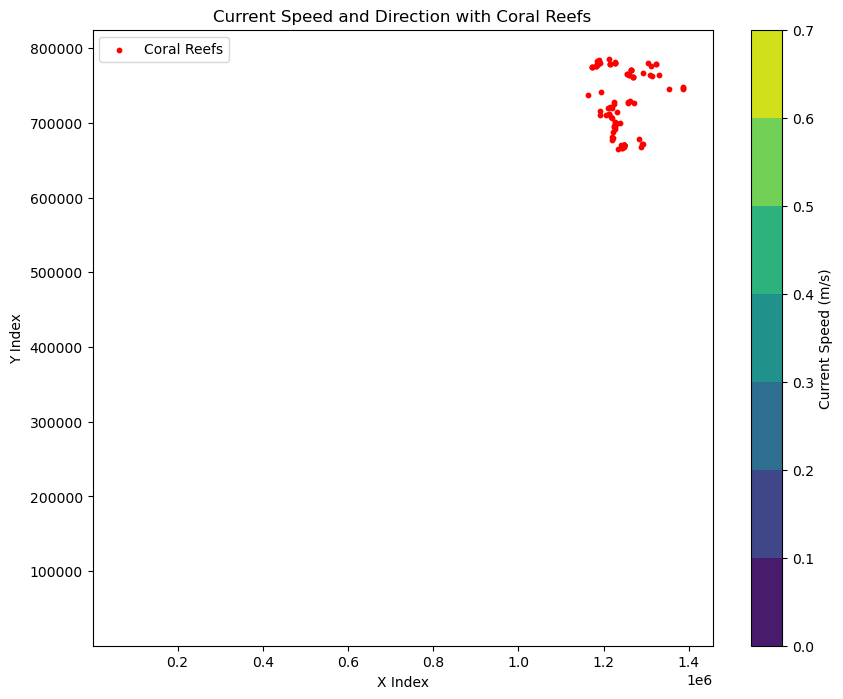

In [ ]:
def plot_coral_on_nor4km(phystates_data, coral_data, x_range=None, y_range=None):

    crs  = obtain_sinmod_crs(phystates_data)

    # Extracting necessary data from nor4km PhysStates.nc
    xc = phystates_data.variables['xc'][:]  # x-coordinates (meters)
    yc = phystates_data.variables['yc'][:]  # y-coordinates (meters)

    current_speed = np.sqrt(phystates_data.variables['u_velocity'][0, 0, :, :]**2 + 
                                   phystates_data.variables['v_velocity'][0, 0, :, :]**2)

    coral_data = transform_coral_coordinates(coral_data, crs)

    # If x_range and y_range are provided, extract the subset of the data
    if x_range and y_range:
        x_subset = xc[x_range[0]:x_range[1]]
        y_subset = yc[y_range[0]:y_range[1]]
        current_speed_subset = current_speed[y_range[0]:y_range[1], x_range[0]:x_range[1]]
        u_velocity_subset = phystates_data.variables['u_velocity'][0, 0, y_range[0]:y_range[1], x_range[0]:x_range[1]]
        v_velocity_subset = phystates_data.variables['v_velocity'][0, 0, y_range[0]:y_range[1], x_range[0]:x_range[1]]
    else:
        x_subset = xc
        y_subset = yc
        current_speed_subset = current_speed
        u_velocity_subset = phystates_data.variables['u_velocity'][0, 0, :, :]
        v_velocity_subset = phystates_data.variables['v_velocity'][0, 0, :, :]

    # Plot the transformed coral data points on top of the nor4km SINMOD grid
    plt.figure(figsize=(10, 8))
    plt.contourf(x_subset, y_subset, current_speed_subset, cmap='viridis')
    plt.colorbar(label='Current Speed (m/s)')
    plt.quiver(x_subset, y_subset, u_velocity_subset, v_velocity_subset, scale=50, color='white')
    plt.scatter(coral_data['x'], coral_data['y'], color='red', label='Coral Reefs', s=10)

    plt.xlabel('X Index')
    plt.ylabel('Y Index')
    plt.title('Current Speed and Direction with Coral Reefs')
    plt.legend()
    plt.show()

# Suggested gin ranges
x_range_gin = (85, 110)
y_range_gin = (30, 45)

# Suggested nor4km ranges
x_range_nor4km = (200, 300)
y_range_nor4km = (200, 240)

# Example usage
plot_coral_on_nor4km(nor4km_PhysStates_data, coral_data, x_range=x_range_nor4km, y_range=y_range_nor4km)


In [ ]:
# Comparing grids between gin and nor4km

# Create a transformer to transform from SINMOD to wgs84 (geographic)
transformer_sinmod_to_wgs84 = Transformer.from_crs(crs_sinmod, crs_wgs84, always_xy=True)

# Import the nor4km SINMOD data
filename_nor4km_PhysStates = '/cluster/projects/itk-SINMOD/coral-mapping/nor4km_2019/2019/PhysStates.nc'
nor4km_PhysStates_data = Dataset(filename_nor4km_PhysStates, 'r')

# Extract the corners of the nor4km dataset
nor4km_xc = nor4km_PhysStates_data.variables['xc'][:]  # x-coordinates (meters)
nor4km_yc = nor4km_PhysStates_data.variables['yc'][:]  # y-coordinates (meters)

# Get the corner points of the nor4km grid in SINMOD
nor4km_corners_sinmod = [
    (nor4km_xc[0], nor4km_yc[0]),  # bottom-left
    (nor4km_xc[-1], nor4km_yc[0]),  # bottom-right
    (nor4km_xc[0], nor4km_yc[-1]),  # top-left
    (nor4km_xc[-1], nor4km_yc[-1])  # top-right
]

# Transform each corner to WGS84
nor4km_corners_wgs84 = [transformer_sinmod_to_wgs84.transform(x, y) for x, y in nor4km_corners_sinmod]

# Print the corners in WGS84 for the nor4km dataset
print("nor4km dataset corners in WGS84:")
for i, (lon, lat) in enumerate(nor4km_corners_wgs84):
    print(f"Corner {i + 1} in WGS84: Longitude = {lon}, Latitude = {lat}")

# Get the corner points of the grid in SINMOD
corners_sinmod = [
    (xc[0], yc[0]),  # bottom-left
    (xc[-1], yc[0]),  # bottom-right
    (xc[0], yc[-1]),  # top-left
    (xc[-1], yc[-1])  # top-right
]

# Transform each corner to WGS84
corners_wgs84 = [transformer_sinmod_to_wgs84.transform(x, y) for x, y in corners_sinmod]

# Compare with the gin corners
print("\nGin dataset corners in WGS84:")
for i, (lon, lat) in enumerate(corners_wgs84):
    print(f"Corner {i + 1} in WGS84: Longitude = {lon}, Latitude = {lat}")

nor4km dataset corners in WGS84:
Corner 1 in WGS84: Longitude = 1.3698685244952065, Latitude = 47.143175348243595
Corner 2 in WGS84: Longitude = 57.553432429347204, Latitude = 65.63584746357313
Corner 3 in WGS84: Longitude = -31.55881945222753, Latitude = 53.70437639133848
Corner 4 in WGS84: Longitude = 24.309932474020215, Latitude = 89.65241102881276

Gin dataset corners in WGS84:
Corner 1 in WGS84: Longitude = 1.3135773804601496, Latitude = 47.32841550936124
Corner 1 in WGS84: Longitude = 1.3135773804601496, Latitude = 47.32841550936124
Corner 2 in WGS84: Longitude = 97.47245984834383, Latitude = 58.93764626594391
Corner 2 in WGS84: Longitude = 97.47245984834383, Latitude = 58.93764626594391
Corner 3 in WGS84: Longitude = -60.765424432837115, Latitude = 49.15236120778398
Corner 3 in WGS84: Longitude = -60.765424432837115, Latitude = 49.15236120778398
Corner 4 in WGS84: Longitude = -166.59365376669095, Latitude = 61.750729037153114
Corner 4 in WGS84: Longitude = -166.59365376669095, L